In [1]:
# Import packages
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Define paths
measurements_input_path = '../../Output/Measurements/'
figures_output_path = '../../Output/Figures/'

pixel_size = 0.1964636542239686 # in micron

# Read data
df = (pd.read_csv(measurements_input_path + 'all_props.csv')
      .assign(diam_um = lambda df_: df_.equivalent_diameter_area * pixel_size)
      .sort_values('date')
)

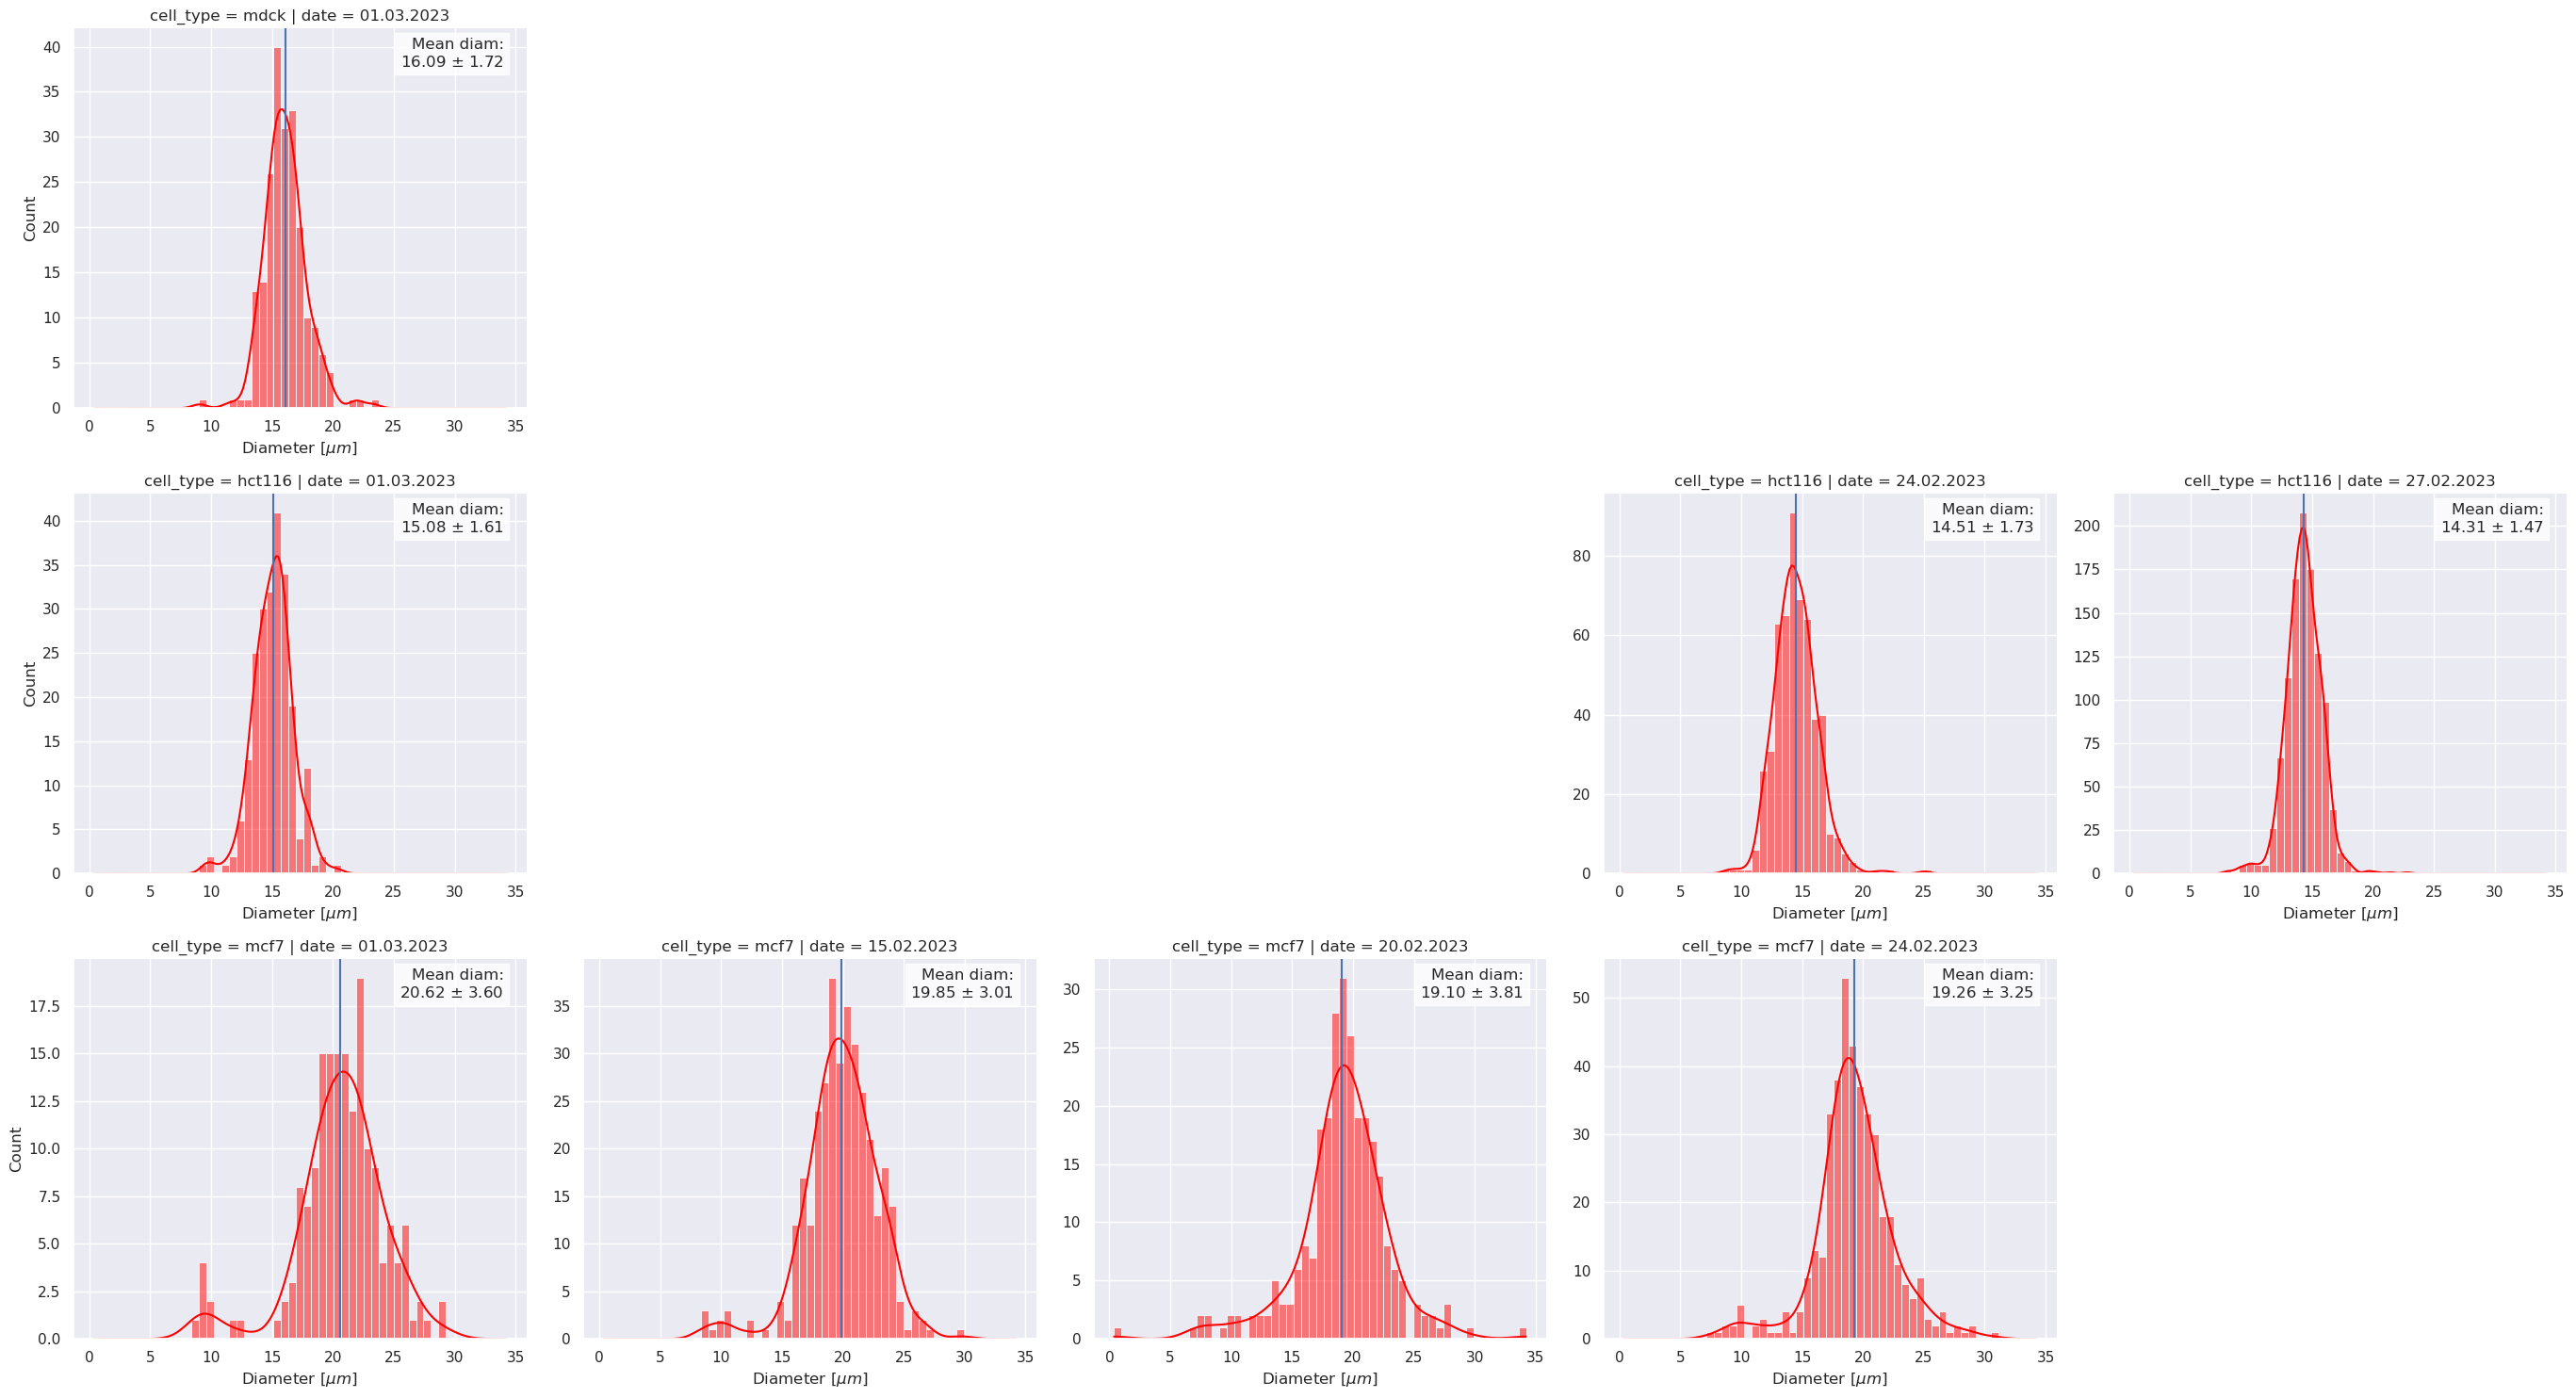

In [4]:
sns.set(style="darkgrid")
g = sns.displot(data=df, x="diam_um", row='cell_type', col='date', color="red", kind='hist', kde=True, facet_kws={'sharey':False, 'sharex':False}, aspect=1.1)
g.set(xlabel='Diameter [$\mu m$]')
for (i,j,k), data in g.facet_data():
    ax = g.facet_axis(i, j)
    if data.empty:
        ax.set_axis_off()
        ax.set_title('')
    else:
        ax.axvline(data.diam_um.mean())
        ax.text(x=0.95, y=0.9, s="Mean diam:\n{:.2f} $\pm$ {:.2f}".format(data.diam_um.mean(), data.diam_um.std()), transform=ax.transAxes, ha='right', bbox=dict(facecolor='white', alpha=0.8))
        
plt.tight_layout()
# plt.savefig(figures_output_path + 'histogram_date_celltype_separated.pdf')

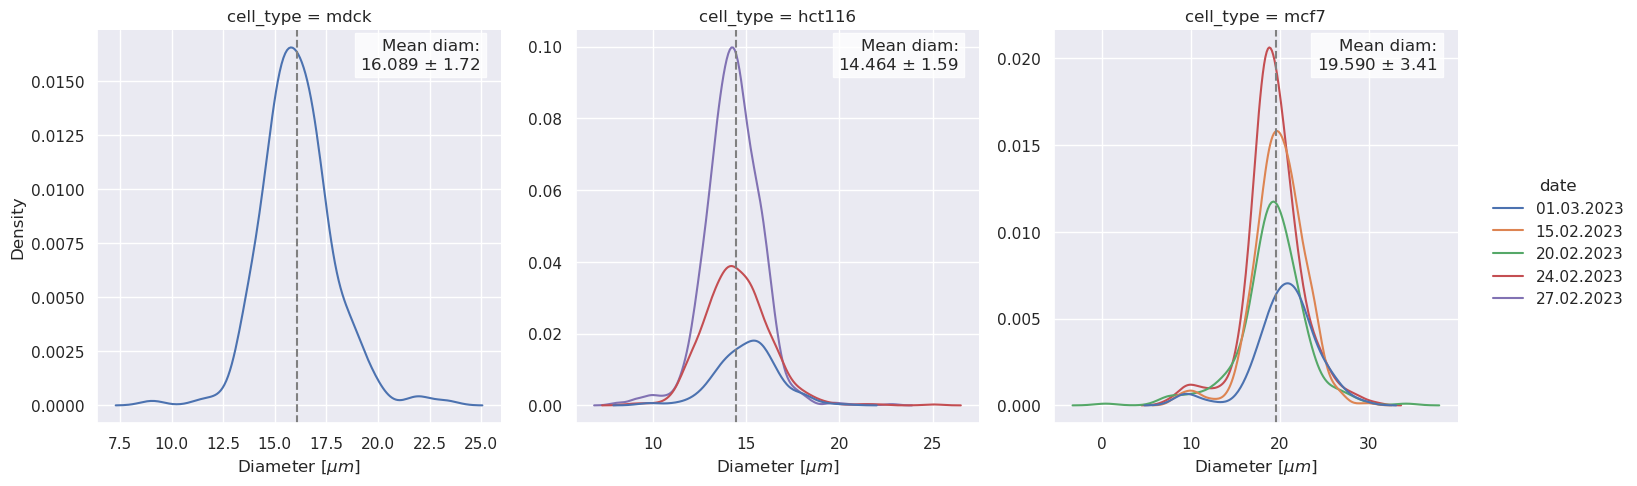

In [8]:
g = sns.displot(data=df, x="diam_um", col='cell_type', hue='date', kind='kde', facet_kws={'sharey':False, 'sharex':False})
for (i,j,k), data in g.facet_data():
    ax = g.facet_axis(i, j)
    ax.axvline(data.diam_um.mean(), color='gray', ls='--')
    ax.text(x=0.95, y=0.9, s="Mean diam:\n{:.3f} $\pm$ {:.2f}".format(data.diam_um.mean(), data.diam_um.std()), transform=ax.transAxes, ha='right', bbox=dict(facecolor='white', alpha=0.8))
    
g.set(xlabel='Diameter [$\mu m$]')
plt.savefig(figures_output_path + 'histogram_date_celltype_together.pdf')
plt.show()

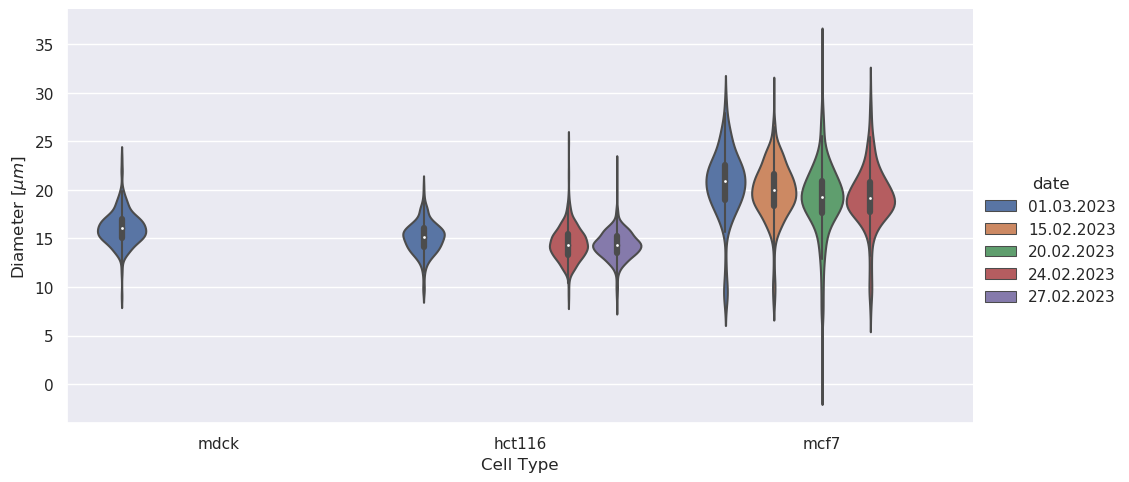

In [7]:
g = sns.catplot(data=df, y="diam_um", x='cell_type', hue='date', kind='violin', aspect=2)
g.set(ylabel='Diameter [$\mu m$]', xlabel='Cell Type')
plt.savefig(figures_output_path + 'violinplot_date_celltype_together.pdf')
plt.show()